In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

In [21]:
def load_and_explore_data(file_path):
  
    data = pd.read_csv(file_path)
    print("Dataset Shape:", data.shape)
    print("\nFirst few rows:")
    print(data.head())
    print("\nData Info:")
    print(data.info())
    return data

In [22]:
def load_and_explore_data(file_path):
  
    data = pd.read_csv(file_path)
    print("Dataset Shape:", data.shape)
    print("\nFirst few rows:")
    print(data.head())
    print("\nData Info:")
    print(data.info())
    return data

In [23]:
def preprocess_data(data):
    encoded_data = data.copy()
    

    encoded_data['Crop'] = encoded_data['Crop'].astype('category').cat.codes
    encoded_data['Season'] = encoded_data['Season'].astype('category').cat.codes
    encoded_data['State'] = encoded_data['State'].astype('category').cat.codes
    
  
    X = encoded_data[['State', 'Crop_Year', 'Crop', 'Season', 'Area', 
                      'Annual_Rainfall', 'Fertilizer', 'Pesticide']]
    y = encoded_data['Yield']
    

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, X.columns, y


In [24]:

def perform_pca_analysis(X_scaled, feature_names):
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    
    explained_variance_ratio = pca.explained_variance_ratio_
    

    plt.figure(figsize=(12, 8))
    components_df = pd.DataFrame(
        pca.components_,
        columns=feature_names,
        index=[f'PC{i+1}' for i in range(len(pca.components_))]
    )
    sns.heatmap(components_df, cmap='coolwarm', center=0, annot=True, fmt='.2f')
    plt.title('PCA Components Heatmap')
    plt.tight_layout()
    plt.show()
    
   
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), 
             np.cumsum(explained_variance_ratio), 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs Number of Components')
    plt.grid(True)
    plt.show()
    
    return X_pca, pca

In [25]:
def train_and_evaluate_model(X, y):

    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=44
    )
    

    model = RandomForestRegressor(n_estimators=100, random_state=44)
    model.fit(X_train, y_train)
    
   
    y_pred = model.predict(X_test)
    
 
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Performance Metrics:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    return model, y_test, y_pred

In [26]:
def visualize_results(y_test, y_pred, data):

    max_yield = data['Yield'].max()
    results = pd.DataFrame({
        'Actual (tons/acre)': y_test.values[:5],
        'Predicted (tons/acre)': y_pred[:5]
    })
    results['Actual (%)'] = (results['Actual (tons/acre)'] / max_yield) * 100
    results['Predicted (%)'] = (results['Predicted (tons/acre)'] / max_yield) * 100
    
   
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Yield')
    plt.ylabel('Predicted Yield')
    plt.title('Actual vs Predicted Yield')
    plt.tight_layout()
    plt.show()
    
    print("\nSample Predictions (Yield in tons per acre and percentage):")
    print(results)

Dataset Shape: (19689, 10)

First few rows:
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------         

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


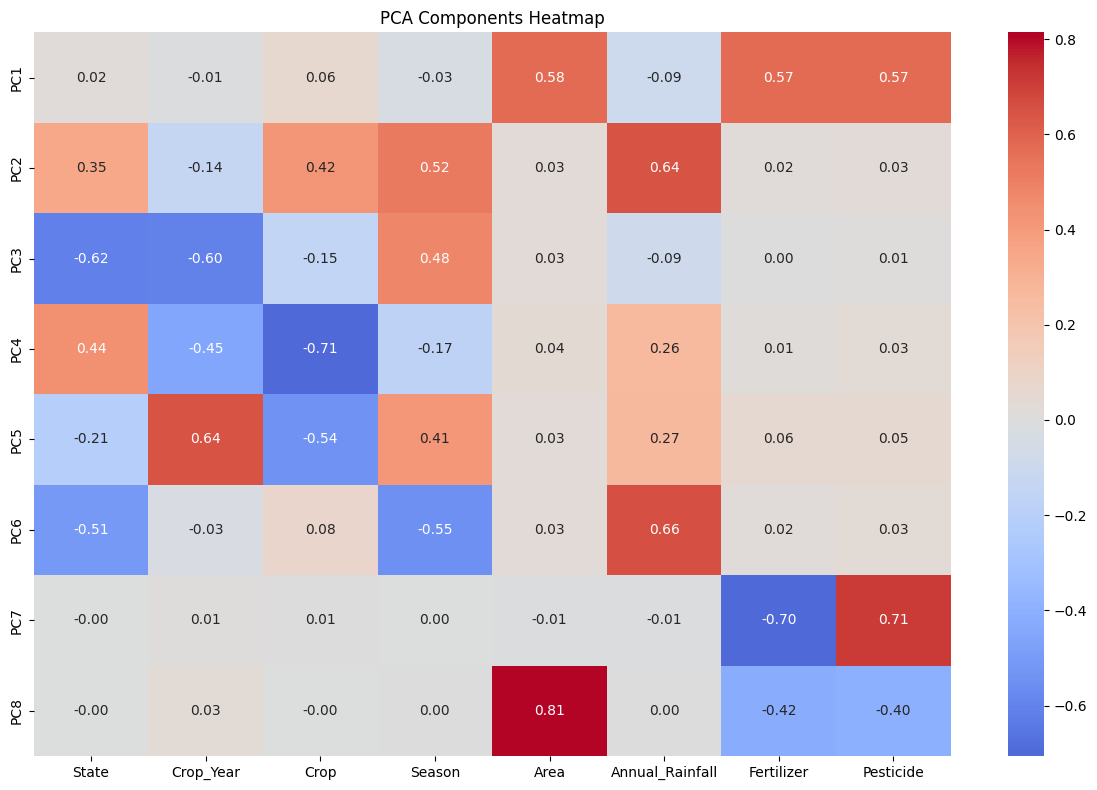

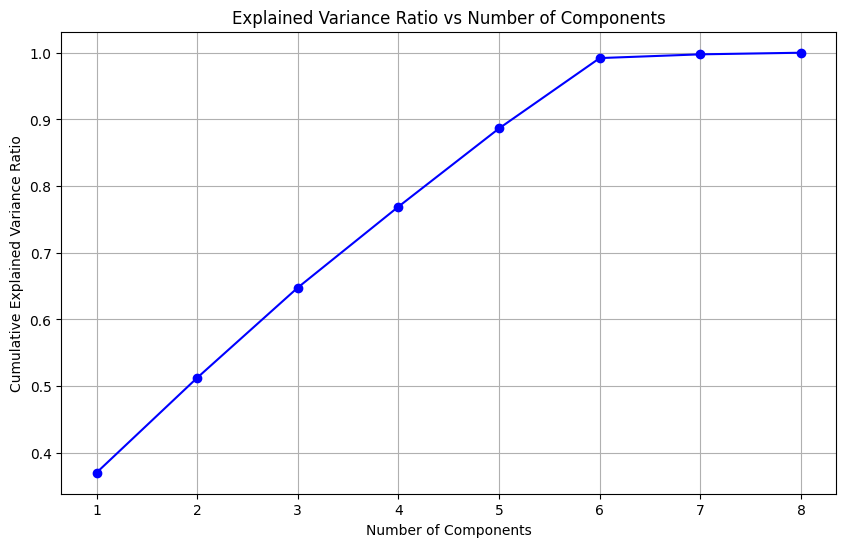

Model Performance Metrics:
MSE: 5089.41
RMSE: 71.34
R² Score: 0.99


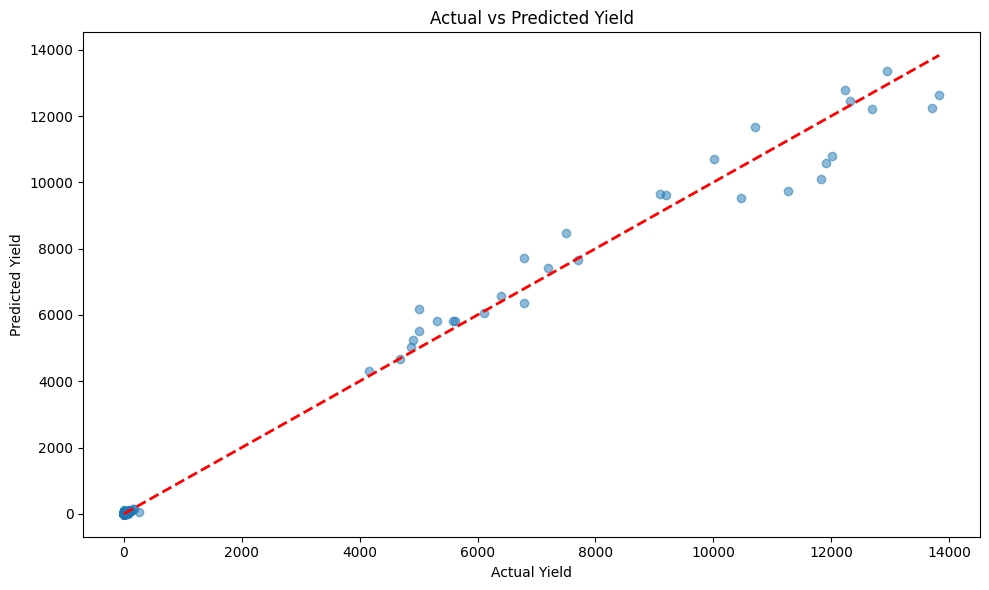


Sample Predictions (Yield in tons per acre and percentage):
   Actual (tons/acre)  Predicted (tons/acre)  Actual (%)  Predicted (%)
0            2.919130               1.510358    0.013831       0.007156
1           52.658750              52.012787    0.249508       0.246448
2            5.091481               5.089394    0.024125       0.024115
3            9.934000               9.613507    0.047069       0.045551
4            1.000000               0.930175    0.004738       0.004407


In [27]:

if __name__ == "__main__":
    
    file_path = "/kaggle/input/crop-prediction-data/crop_yield.csv"
    
    
    data = load_and_explore_data(file_path)
    X_scaled, feature_names, y = preprocess_data(data)
    X_pca, pca = perform_pca_analysis(X_scaled, feature_names)
    model, y_test, y_pred = train_and_evaluate_model(X_scaled, y)
    visualize_results(y_test, y_pred, data)


In [29]:

def split_train_test(data, test_ratio=0.2, seed=42):
 
    np.random.seed(seed)  
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)  
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]  

train_set, test_set = split_train_test(data, 0.2)

print("Train set size:", len(train_set))
print("Test set size:", len(test_set))



Train set size: 15752
Test set size: 3937
